### K 평균

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv('./data/KMeansData.csv')
X=df.iloc[:,:].values
X

array([[  7.33,  73.  ],
       [  3.71,  55.  ],
       [  3.43,  55.  ],
       [  3.06,  89.  ],
       [  3.33,  79.  ],
       [  7.22,  26.  ],
       [  8.12,  15.  ],
       [  5.74,  62.  ],
       [  8.73,  59.  ],
       [  4.73,  74.  ],
       [  5.  ,  78.  ],
       [  2.63,  46.  ],
       [  7.02,   5.  ],
       [  3.45,  38.  ],
       [  3.06,  49.  ],
       [  4.13,  66.  ],
       [  9.17,  29.  ],
       [  7.61,  74.  ],
       [  0.94,  34.  ],
       [  3.67,  71.  ],
       [  8.47,   9.  ],
       [  2.86,  67.  ],
       [  1.9 ,  43.  ],
       [  6.08,   0.  ],
       [  8.42,  90.  ],
       [  6.12,  77.  ],
       [  0.  ,  47.  ],
       [  2.16,  50.  ],
       [  2.24,  38.  ],
       [  2.31,  23.  ],
       [  8.03,  31.  ],
       [  9.02,   2.  ],
       [  2.43,  20.  ],
       [  4.5 ,  80.  ],
       [  8.66,  70.  ],
       [  7.95,  75.  ],
       [  2.03,  26.  ],
       [  5.43,  74.  ],
       [  4.44,  78.  ],
       [  3.17,  76.  ],


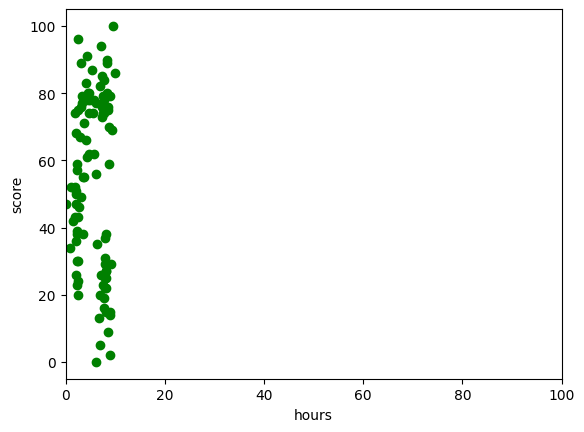

In [6]:
plt.scatter(X[:,0], X[:,1], color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.xlim(0, 100)
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

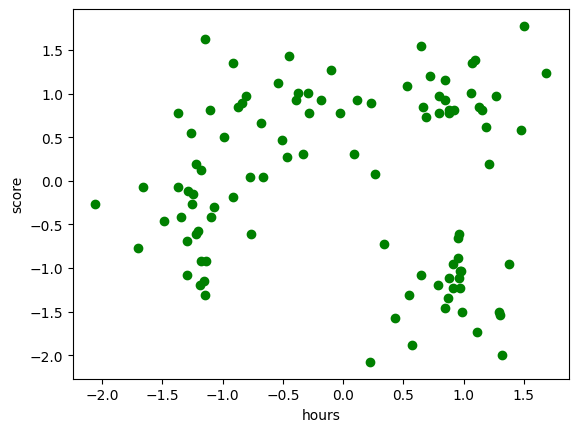

In [8]:
plt.scatter(X[:,0], X[:,1], color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

c:\Users\kosmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kosmo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\kosmo\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kosmo\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\kosmo\App

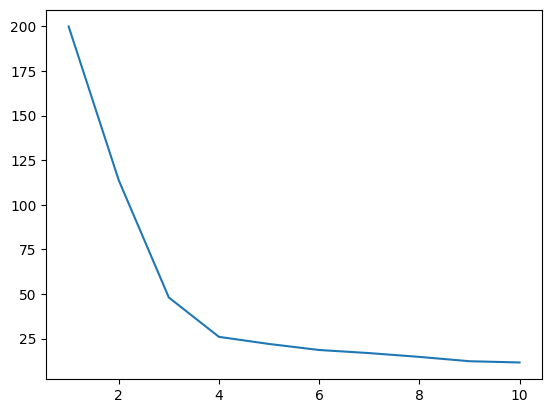

In [9]:
from sklearn.cluster import KMeans
center_list=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    center_list.append(kmeans.inertia_)
    
plt.plot(range(1,11),center_list)
plt.show()

In [10]:
K=4
kmeans=KMeans(n_clusters=K, random_state=0, n_init=10)
group=kmeans.fit_predict(X)
group

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

In [11]:
centers=kmeans.cluster_centers_
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

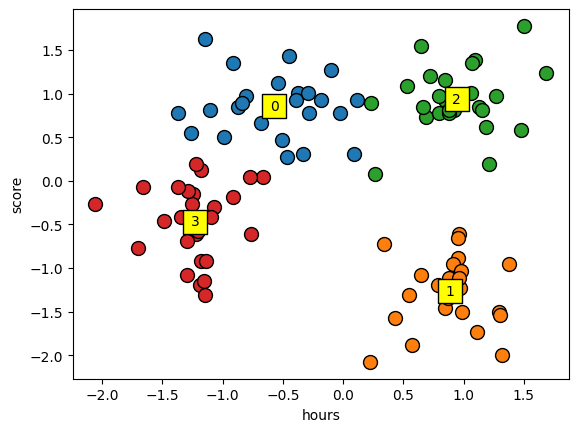

In [12]:
import matplotlib.pyplot as plt
for cluster in range(4):
    plt.scatter(X[group==cluster, 0], X[group==cluster, 1], s=100, ec='black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, ec='black', color='yellow', marker='s')
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center')
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [13]:
X_org=sc.inverse_transform(X)
X_org
centers_org=sc.inverse_transform(centers)

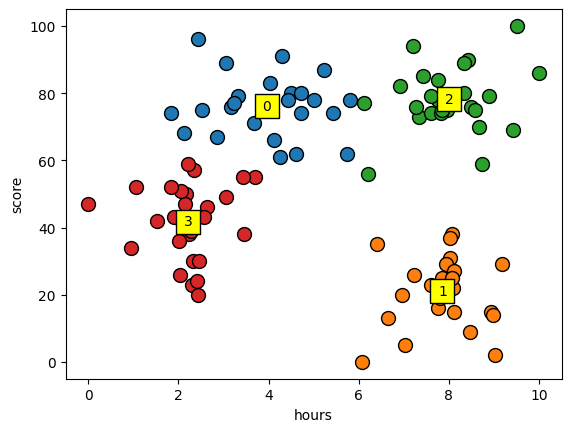

In [14]:
for cluster in range(0,4):
    plt.scatter(X_org[group==cluster, 0], X_org[group==cluster, 1], s=100, ec='black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, ec='black', color='yellow', marker='s')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center')
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [15]:
df2=pd.DataFrame(X_org)
df2

,0,1
0,7.33,73.0
1,3.71,55.0
2,3.43,55.0
3,3.06,89.0
4,3.33,79.0
...,...,...
95,6.21,56.0
96,7.76,84.0
97,5.22,87.0
98,6.65,13.0


In [16]:
df3=pd.DataFrame(group)
df3

,0
0,2
1,3
2,3
3,0
4,0
...,...
95,2
96,2
97,0
98,1


In [17]:
import pandas as pd
pd.concat([df2,df3], axis=1)

,0,1,0
0,7.33,73.0,2
1,3.71,55.0,3
2,3.43,55.0,3
3,3.06,89.0,0
4,3.33,79.0,0
...,...,...,...
95,6.21,56.0,2
96,7.76,84.0,2
97,5.22,87.0,0
98,6.65,13.0,1
